In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [31]:
sub1 = pd.read_csv("submission0.csv")
sub2 = pd.read_csv("submission1.csv")
sub3 = pd.read_csv("submission2.csv")
sub4 = pd.read_csv("submission3.csv")
sub5 = pd.read_csv("submission4.csv")

In [105]:
df = pd.read_csv("top_sub.csv")
#df.iloc[:, 1] = df.iloc[:, 1] * 0.8
#df.iloc[:, 3] = df.iloc[:, 3] * 0.7
#df.iloc[:, 8] = df.iloc[:, 8] * 1.1
df.iloc[:, 2] = df.iloc[:, 2] * 1.5
df.iloc[:, 19] = df.iloc[:, 19] * 2.5
#df.s20 = -10
#df.s22 = -10
df.to_csv("blend_best_18.csv", index=False)

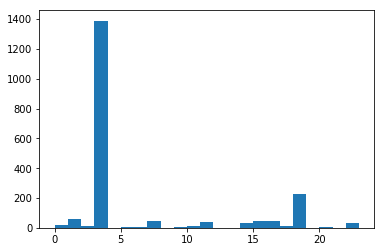

In [100]:
df = pd.read_csv("blend_best_18.csv")
#df =BLEND
a = df.iloc[:, 1:].to_numpy()
plt.hist(a.argmax(axis=1), bins=23)
plt.show()

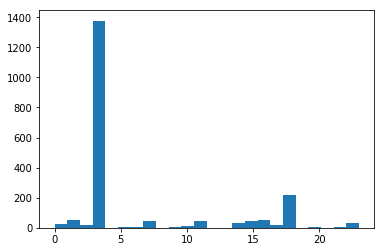

In [104]:
df = pd.read_csv("blend_best_audio_104.csv")
#df =BLEND
a = df.iloc[:, 1:].to_numpy()
plt.hist(a.argmax(axis=1), bins=24)
plt.show()

In [340]:
sub_rare = pd.read_csv("submission_rare.csv")
sub_rare = sub_rare[["recording_id","s0","s1","s2","s3","s4"]]
non_3_list = list(sub_rare[sub_rare.s0 <2].recording_id)

In [361]:
with_12_list = sub_rare[sub_rare.s2 >2].recording_id
not_12_list = sub_rare[sub_rare.s2 <2].recording_id
with_18_list = sub_rare[sub_rare.s1 >1].recording_id

In [358]:
test_sub = pd.read_csv("submission_0.891.csv")

In [359]:
for i in non_3_list:
    test_sub[test_sub.recording_id == i].iloc[:,4] = test_sub[test_sub.recording_id == i].iloc[:,4] / 2
    

In [352]:
for i in with_12_list:
    test_sub[test_sub.recording_id == i].iloc[:,13] = 23
   

In [362]:
for i in not_12_list:
    test_sub[test_sub.recording_id == i].iloc[:,13] = 5

In [360]:
for i in with_18_list:
    test_sub[test_sub.recording_id == i].iloc[:,19] = 23

In [364]:
test_sub.to_csv("try_to_change_3_18_12.csv", index=False)

In [109]:
BLEND=sub1.copy() 
BLEND.iloc[:,1:] = (sub1.iloc[:,1:].rank(axis=1) + sub2.iloc[:,1:].rank(axis=1) + sub3.iloc[:,1:].rank(axis=1)  
                        + sub4.iloc[:,1:].rank(axis=1) + sub5.iloc[:,1:].rank(axis=1) )

In [108]:
BLEND.to_csv("blend_best_audio_105.csv", index=False)

In [106]:
test_sub = pd.read_csv("blend_best_18.csv")
test_sub2 = pd.read_csv("submission_sed_mobnet_framewise_TTA_ens.csv")

In [107]:
BLEND=test_sub.copy() 
BLEND.iloc[:,1:] =  test_sub.iloc[:,1:]*0.98 +test_sub2.iloc[:,1:]*0.02

In [376]:
test_sub = test_sub.sort_values(by=['recording_id']).reset_index(drop=True)
test_sub2 = test_sub2.sort_values(by=['recording_id']).reset_index(drop=True)

In [377]:
BLEND=test_sub.copy() 
BLEND.iloc[:,1:] = test_sub.iloc[:,1:].rank(axis=1) * 0.85 +  test_sub2.iloc[:,1:].rank(axis=1) * 0.15

In [378]:
BLEND.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,15.55,11.650,9.425,23.85,7.20,20.850,6.1,15.35,5.900,...,17.975,16.925,17.15,7.550,21.85,4.25,7.75,11.7,11.75,14.750
1,003bc2cb2,11.15,19.500,13.400,23.00,3.90,9.750,4.3,21.85,9.050,...,16.450,17.450,24.00,16.900,16.50,4.40,1.30,14.7,13.60,7.950
2,0061c037e,10.80,10.300,4.900,23.15,1.00,15.550,8.0,23.85,3.800,...,12.350,15.150,18.60,18.175,8.10,14.45,20.15,3.9,18.85,17.725
3,010eb14d3,23.85,15.700,11.550,21.00,17.15,17.650,4.3,13.50,23.150,...,9.375,8.200,5.30,2.300,22.00,8.75,2.85,19.4,6.75,14.050
4,011318064,5.00,14.125,10.650,22.00,10.85,8.775,8.8,19.85,8.025,...,23.850,23.150,16.75,13.300,19.80,1.90,10.20,18.0,3.80,6.400


In [294]:
test_sub2.head()

,index,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,0,000316da7,10.989,13.195,5.619,22.977,3.205,17.358,2.206,15.984,...,19.980,18.981,14.818,3.580,20.979,0.999,8.367,16.983,9.990,14.569
1,1,003bc2cb2,13.986,16.192,11.197,22.522,8.367,4.620,2.206,20.563,...,16.775,20.188,22.433,14.985,19.189,0.000,0.999,12.196,7.409,4.995
2,2,0061c037e,16.400,14.985,1.831,21.978,0.000,11.572,5.411,22.977,...,11.405,9.782,19.397,19.356,7.992,14.235,13.570,5.370,17.566,16.359
3,3,010eb14d3,22.839,14.027,6.993,15.360,19.189,17.774,2.997,11.780,...,14.777,11.197,3.580,0.000,20.979,4.995,6.410,19.772,2.830,9.782
4,4,011318064,4.787,11.613,14.985,21.908,7.784,9.158,7.617,17.774,...,22.907,21.119,19.189,15.984,19.772,0.999,3.580,17.191,3.413,2.206


In [387]:
BLEND.to_csv("blend_fr_and_cl.csv", index=False)

In [108]:
num_of_top  = []
for i in range(24):
    num = test_sub[test_sub.iloc[:, 1:] == 120][f's{i}'].value_counts().sum()
    num_of_top.append(num)
    print(f" rows with top rank {num} for class {i}")

 rows with top rank 74 for class 0
 rows with top rank 5 for class 1
 rows with top rank 48 for class 2
 rows with top rank 9 for class 3
 rows with top rank 1 for class 4
 rows with top rank 13 for class 5
 rows with top rank 2 for class 6
 rows with top rank 96 for class 7
 rows with top rank 2 for class 8
 rows with top rank 4 for class 9
 rows with top rank 19 for class 10
 rows with top rank 33 for class 11
 rows with top rank 194 for class 12
 rows with top rank 5 for class 13
 rows with top rank 71 for class 14
 rows with top rank 76 for class 15
 rows with top rank 80 for class 16
 rows with top rank 10 for class 17
 rows with top rank 0 for class 18
 rows with top rank 2 for class 19
 rows with top rank 14 for class 20
 rows with top rank 0 for class 21
 rows with top rank 17 for class 22
 rows with top rank 65 for class 23


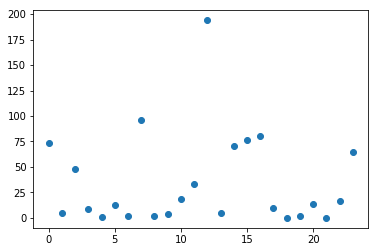

In [103]:
plt.scatter( range(24), num_of_top)
#Количество топ ранков 

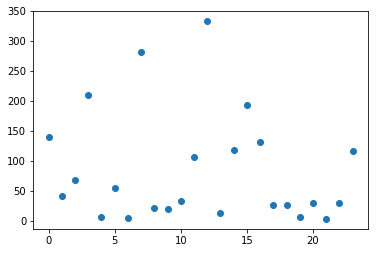

In [101]:
plt.scatter( range(24), num_of_top,)
#количество очень высоких ранков (включая топ)

In [32]:
BLEND=sub1.copy() 
BLEND.iloc[:,1:] =  sub1.iloc[:,1:]*0.2 +sub2.iloc[:,1:]*0.2 +sub3.iloc[:,1:]*0.2 +sub4.iloc[:,1:]*0.2 +sub5.iloc[:,1:]*0.2 

In [34]:
BLEND.to_csv("blend_best_audio_8.csv", index=False)

In [187]:
sub_1 = pd.read_csv("blend_best_audio.csv")
sub_2 = pd.read_csv("blend_best.csv")
sub_3 = pd.read_csv("blend_best_audio_2.csv")
sub_4 = pd.read_csv("blend_best_audio_3.csv")
sub_5 = pd.read_csv("blend_best_audio_6.csv")

In [10]:
sub_1.sort_values(by=['recording_id']).head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1915,000316da7,4.161964,1.802210,-0.265247,6.791487,-0.001799,2.949448,-2.107134,1.870751,-0.133092,...,0.614258,0.414735,1.560112,-0.883033,5.367585,-1.112157,-0.999262,-0.665037,1.439668,2.050804
1663,003bc2cb2,-1.623934,7.625922,-0.670767,7.197850,-2.555630,0.308512,-1.982703,3.374898,-0.495057,...,0.352405,-0.590651,16.854566,0.357952,-1.785065,1.940798,-1.715169,-0.430141,0.548642,-1.460492
1531,0061c037e,-0.585584,-0.616859,-0.469404,4.602220,-2.508212,5.202356,0.689144,6.988405,-1.389242,...,0.438946,2.351403,2.200640,1.893506,-2.035103,2.227480,3.263321,-3.091626,3.013381,1.431706
1596,010eb14d3,11.562713,3.513950,0.522783,4.112876,0.994415,2.381868,-3.467838,-2.809739,6.693184,...,-1.068233,-3.309685,-2.255810,-3.969741,7.635671,-1.816863,-4.866176,2.794981,-0.005596,0.435855
914,011318064,-1.507223,3.088723,-1.456852,5.063047,1.446244,-1.273067,-0.159898,3.766171,-1.277230,...,8.881618,6.378230,0.891366,0.434343,1.076208,-0.986283,-0.020792,3.477447,0.577718,0.000055


In [11]:
sub_2.sort_values(by=['recording_id']).head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1915,000316da7,-2.305784,-1.508250,-4.849696,7.361980,-6.173803,-2.782570,-6.032022,-3.442756,-6.953715,...,-2.306187,-4.478064,-4.254130,-7.407853,-2.476290,-8.269510,-7.080528,-7.523123,-4.376950,-3.620015
1663,003bc2cb2,-3.663615,-0.123527,-3.820045,4.459423,-5.696728,-2.832309,-5.827941,-2.872002,-3.494415,...,-1.087726,-4.955475,6.348106,-5.414689,-2.572783,-4.504767,-5.767161,-3.108359,-5.122956,-4.907036
1531,0061c037e,-2.686965,-1.737252,-3.005951,3.938396,-3.927102,0.927712,-2.747578,-0.370396,-4.528361,...,-1.258592,-3.523027,-3.634834,-2.154037,-4.042991,-3.784031,-2.334716,-4.306933,-1.359791,-1.357546
1596,010eb14d3,3.782679,-2.542564,-2.286544,0.201700,-5.591485,-2.578001,-5.869805,-6.296357,3.105944,...,-4.836608,-5.927276,-4.822332,-7.014673,-0.744927,-5.365666,-6.980243,-3.576626,-4.955204,-5.322278
914,011318064,-2.393609,0.035095,-3.992082,3.263129,-5.809334,-4.548888,-3.262460,-1.020633,-6.208321,...,4.988354,3.119068,-4.494595,-3.947276,-3.115875,-6.140316,-2.513488,-3.892877,-4.950936,-4.548702


In [188]:
sub_3.sort_values(by=['recording_id']).head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1915,000316da7,0.915531,-3.324348,-1.760221,3.896867,-3.739624,-0.419195,-4.364379,-1.638377,-2.693565,...,-3.660802,-2.966924,-2.561953,-2.285565,1.650210,-4.296860,-3.806465,-3.633718,-1.797271,-1.370668
1663,003bc2cb2,-4.924466,-0.947790,-4.666541,2.439134,-4.942465,-3.375280,-5.937402,-2.257205,-3.456649,...,-3.596964,-5.345518,11.697668,-4.030631,-4.436580,-4.682998,-7.402630,-1.434477,-3.838332,-4.871247
1531,0061c037e,-2.009010,-2.617947,-2.026549,2.337573,-4.643965,0.394659,-1.899708,4.130112,-3.784208,...,-1.649398,-0.415492,-0.672765,-1.675508,-3.007307,-1.955117,-0.594333,-3.931380,-1.012046,-1.385749
1596,010eb14d3,7.267484,-2.495108,-4.181504,-1.433285,-2.331724,-2.275258,-7.665230,-5.996912,4.901180,...,-4.682942,-6.923335,-5.913143,-7.290507,2.968876,-7.683247,-9.421214,-0.164131,-4.743804,-3.916348
914,011318064,-2.293768,-0.667333,-2.672447,1.493120,-1.273087,-3.851851,-3.012667,-0.135390,-2.778063,...,4.366614,3.657401,-2.987978,-3.477543,-1.201534,-4.671621,-2.564006,0.812132,-3.107961,-2.342793


In [189]:
BLEND=sub_1.copy()
BLEND.iloc[:,1:] =  sub_1.sort_values(by=['recording_id']).iloc[:,1:]*0.2 \
    + sub_2.sort_values(by=['recording_id']).iloc[:,1:]*0.2 \
    + sub_3.sort_values(by=['recording_id']).iloc[:,1:]*0.2 \
    + sub_4.sort_values(by=['recording_id']).iloc[:,1:]*0.2 + sub_5.sort_values(by=['recording_id']).iloc[:,1:]*0.2
BLEND.to_csv("blend_of_blend_5.csv", index=False)

In [58]:
BLEND[BLEND.recording_id == i].iloc[:,1 :] = sub_1[sub_1.recording_id == i].iloc[:,1:]*0.35 +sub_2[sub_2.recording_id == i].iloc[:,1:]*0.35 +sub_3[sub_3.recording_id == i].iloc[:,1:]*0.3

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [226]:
from sklearn.preprocessing import MinMaxScaler
sub_all = pd.read_csv("blend_of_all_and_rare_new (3) (1).csv")
sub_rare = pd.read_csv("blend_of_blend_9.csv")
labels_dict = {3 : 0, 18: 1, 12: 2, 7 : 3, 15: 4}

In [227]:
BLEND=sub_all.copy() 
BLEND.iloc[:,1:] =  sub_all.iloc[:,1:]*0.55 +sub_rare.iloc[:,1:]*0.45

In [183]:
scaler = MinMaxScaler()
sub_all.iloc[:,1:] = scaler.fit_transform(sub_all.iloc[:,1:])
sub_rare.iloc[:,1:] = scaler.fit_transform(sub_rare.iloc[:,1:])

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [187]:
sub_all.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,c0b2be5e2,-1.883584,1.815045,-2.877908,4.809772,-2.551993,-2.160138,-5.027962,-1.310938,-2.468151,...,-0.908831,-3.070396,7.587770,-3.935907,-0.441027,-3.986821,-5.509745,-0.256135,-2.462747,-2.716014
1,611ff585c,0.711411,-1.077738,-0.491119,1.403447,-2.967186,2.564621,0.682368,0.481403,-1.510712,...,-1.399647,-0.076334,-0.177548,-0.640766,-1.294788,-1.013165,-0.482219,-3.093962,0.281223,-0.757534
2,ca46b4b44,-1.988873,-0.984200,-2.396975,1.261697,-2.585580,-2.006589,-0.348452,0.422421,-3.600360,...,2.836195,-0.495593,-2.401218,-1.777266,-2.357891,-2.666507,0.460858,-1.896186,-1.847023,-1.477721
3,b18a6c30b,-1.985411,-0.654988,0.737680,2.861992,-2.239523,-1.239174,-0.942930,0.602274,-3.067493,...,-0.320140,1.840420,-0.794255,3.715736,-1.325353,-2.058520,-1.348646,-2.368341,-0.713245,-1.446174
4,deeceda0d,-0.366180,-0.748973,-1.882285,5.628646,-2.640267,-0.129279,-2.164555,-0.621967,-2.525602,...,-0.757148,-2.573654,0.433512,-2.558610,0.616643,-2.647223,-2.749804,-1.935794,-0.761204,-0.817383


In [188]:
sub_rare.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,c0b2be5e2,3.432108,0.018330,0.415827,-0.714464,-0.175616,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,611ff585c,3.494000,-2.113716,-1.798275,1.786302,2.007728,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ca46b4b44,3.568202,-2.057512,-1.836242,1.671672,1.681809,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b18a6c30b,2.898478,-0.906797,-0.787818,1.440325,2.655959,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deeceda0d,2.835178,0.524910,0.228772,0.304494,-0.901152,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
sub_all.iloc[:, 4] +=  sub_rare.iloc[:, 1] * 1.2
sub_all.iloc[:, 19] += sub_rare.iloc[:, 2] * 2
sub_all.iloc[:, 13] += sub_rare.iloc[:, 3] 
sub_all.iloc[:, 8] += sub_rare.iloc[:, 4] *0.9 
#sub_all.iloc[:, 16] += sub_rare.iloc[:, 5] 
sub_all.iloc[:, 13] = sub_all.iloc[:, 13] *0.7
sub_all.iloc[:, 24] = sub_all.iloc[:, 24] * 1.2

In [174]:
sub_all.loc[sub_all.s3 > 0.56, "s3"] = 1

In [190]:
sub_all.head()

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,c0b2be5e2,-1.883584,1.815045,-2.877908,8.241881,-2.551993,-2.160138,-5.027962,-2.025403,-2.468151,...,-0.908831,-3.246012,7.587770,-3.935907,-0.422697,-3.986821,-5.509745,-0.256135,-2.462747,-2.716014
1,611ff585c,0.711411,-1.077738,-0.491119,4.897447,-2.967186,2.564621,0.682368,2.267705,-1.510712,...,-1.399647,1.931394,-0.177548,-0.640766,-3.408503,-1.013165,-0.482219,-3.093962,0.281223,-0.757534
2,ca46b4b44,-1.988873,-0.984200,-2.396975,4.829900,-2.585580,-2.006589,-0.348452,2.094094,-3.600360,...,2.836195,1.186216,-2.401218,-1.777266,-4.415403,-2.666507,0.460858,-1.896186,-1.847023,-1.477721
3,b18a6c30b,-1.985411,-0.654988,0.737680,5.760470,-2.239523,-1.239174,-0.942930,2.042599,-3.067493,...,-0.320140,4.496379,-0.794255,3.715736,-2.232150,-2.058520,-1.348646,-2.368341,-0.713245,-1.446174
4,deeceda0d,-0.366180,-0.748973,-1.882285,8.463824,-2.640267,-0.129279,-2.164555,-0.317472,-2.525602,...,-0.757148,-3.474805,0.433512,-2.558610,1.141553,-2.647223,-2.749804,-1.935794,-0.761204,-0.817383


In [219]:
sub_all.to_csv("blend_of_all_and_rare_new.csv", index=False)

In [131]:
sub1 = pd.read_csv("blend_best_audio_6.csv")
sub2 = pd.read_csv("submission_kaggle.csv")

In [132]:
BLEND=sub1.copy() 
BLEND.iloc[:,1:] = (sub1.sort_values(by=['recording_id']).iloc[:,1:].rank(axis=1) * 0.5 + sub2.sort_values(by=['recording_id']).iloc[:,1:].rank(axis=1) * 0.5)
BLEND.to_csv("blend_of_blend_10.csv", index=False)

In [388]:
sub1 = pd.read_csv("submission_sed_framewise_0.csv")
sub2 = pd.read_csv("submission_sed_framewise_1.csv")
sub3 = pd.read_csv("submission_sed_framewise_2.csv")
sub4 = pd.read_csv("submission_sed_framewise_3.csv")
sub5 = pd.read_csv("submission_sed_framewise_4.csv")
sub6 = pd.read_csv("submission_sed_framewise_5.csv")

In [389]:
BLEND=sub1.copy() 
BLEND.iloc[:,1:] = sub1.iloc[:,1:] +sub2.iloc[:,1:] +sub3.iloc[:,1:] +sub4.iloc[:,1:] +sub5.iloc[:,1:] +sub6.iloc[:,1:]

In [393]:
BLEND.to_csv("blend_of_blend_framewise.csv", index=False)

In [415]:
sub1 = pd.read_csv("submission_sed_mobnet_framewise_TTA_ens.csv")
sub2 = pd.read_csv("mb_best_blend_ever.csv")

test_sub = sub1.sort_values(by=['recording_id']).reset_index(drop=True)
test_sub2 = sub2.sort_values(by=['recording_id']).reset_index(drop=True)

BLEND=test_sub.copy() 
BLEND.iloc[:,1:] = test_sub.iloc[:,1:].rank(axis=1) * 0.2 +  test_sub2.iloc[:,1:].rank(axis=1) * 0.8

In [417]:
BLEND.to_csv("mb_best_blend_ever_3.csv", index=False)